# Week11 
## Python Interactive Visualization Tutorial 1

Zongcheng Chu 3/25/2020

## 0. Introduction

ipywidgets are **interactive HTML widgets** for Jupyter notebooks.

Notebooks come alive when interactive widgets are used. Users gain control of their data and can visualize changes in the data.

Learning becomes an immersive, fun experience. Researchers can easily see how changing inputs to a model impact the results. We hope you will add ipywidgets to your notebooks, and we're here to help you get started.

In [0]:
def f(x):
    print(x * x)

In [0]:
f(9)

81


In [0]:
# import * means i imported every function/object from the "ipywidgets" library
from ipywidgets import *

In [2]:
interact(f, x=(0, 100));

NameError: ignored

Interactive Python widgets:<br>
    A Python widget is an object that represents a control on the front end, like a slider.

In [0]:
slider = FloatSlider(
    value=7.5,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Value:',
)

In [4]:
slider

FloatSlider(value=7.5, description='Value:', max=10.0, min=5.0)

In [0]:
slider.value

7.7

You can trigger actions in the kernel when a control value changes by "observing" the value. Here we set a global variable when the slider value changes.

In [0]:
output = slider.value
def handle_change(change):
    output = slider.value
slider.observe(handle_change, 'value')

In [0]:
output

9.2

In [12]:
text = FloatText(description='Value')
link((slider, 'value'), (text, 'value'))
VBox([slider, text])

## 1. Using interact
The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively.

In [0]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [13]:
def f(x):
    return 3 * x

#When you pass this function as the first argument to interact along with an integer keyword argument (x=10), 
# a slider is generated and bound to the function parameter.

interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [0]:
# If you pass True or False, interact will generate a checkbox:

interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [0]:
# If you pass a string, interact will generate a Text field.
interact(f, x='3');

interactive(children=(Text(value='3', description='x'), Output()), _dom_classes=('widget-interact',))

In [0]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

If a 2-tuple of integers is passed (min, max), an integer-valued slider is produced with those minimum and maximum values (inclusively). In this case, the default step size of 1 is used.

In [0]:
interact(f, x=(0, 4));

interactive(children=(IntSlider(value=2, description='x', max=4), Output()), _dom_classes=('widget-interact',)…


A FloatSlider is generated if any of the values are floating point. The step size can be changed by passing a third element in the tuple.

In [0]:
interact(f, x=(0, 10, 0.01));

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.01), Output()), _dom_classes=('…

Dropdown menus are constructed by passing a list of strings. In this case, the strings are both used as the names in the dropdown menu UI and passed to the underlying Python function.

In [0]:
def count_word(x):
    return len(x)

interact(count_word, x=['apples','oranges']);

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

If you want a dropdown menu that passes non-string values to the Python function, you can pass a list of tuples of the form ('label', value). **The first items** are the names in the dropdown menu UI and **the second items** are values that are the arguments passed to the underlying Python function.

In [0]:
def f(x):
    return x+1

interact(f, x=[('one', 10), ('two', 20)]);

interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

## 2. Use interactive

IPython provides another function, interactive, that is useful when you want to reuse the widgets that are produced or access the data that is bound to the UI controls.<br>

unlike interact, the return value of the function will not be displayed automatically, but you can display a value inside the function with IPython.display.display.<br>

Here is a function that displays the sum of its two arguments and returns the sum. The display line may be omitted if you don't want to show the result of the function.

In [0]:
from IPython.display import display

def f(a, b):
    display(a + b) # uncomment it of you don't want to see the results.
    return a+b

In [0]:
interactive(f, a=10, b=20)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

The widget is an interactive, a subclass of VBox, which is a container for other widgets.

In [0]:
type(interactive(f, a=10, b=20))

ipywidgets.widgets.interaction.interactive

In [0]:
w = interactive(f, a=10, b=20)
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [0]:
# current return value of the function
w.result

32

## 3. Basic interactive plot

The function below plots a straight line whose slope and intercept are given by its arguments.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def line_plot(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

In [27]:
interactive_plot = interactive(line_plot, m=(-2.0, 2.0), b=(-3, 3, 0.5), continuous_update=False)
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## 4. Disabling continuous updates

When interacting with long running functions, or even with short functions whose results take some to display, realtime feedback is a burden instead of being helpful. You might have noticed the output of some of the widgets above "flickering" as you adjusted the controls. By default, interact and interactive call the function for every update of the widgets value.

There are two ways to mitigate this. You can either only execute on demand, or restrict execution to mouse release events.

### interact_manual

The interact_manual function provides a variant of interaction that allows you to restrict execution so it is only done on demand. A **button** is added to the interact controls that allows you to trigger an execute event.

In [0]:
def slow_function(i):
    """
    Sleep for 1 second then print the argument
    """
    from time import sleep
    print('Sleeping...')
    sleep(1)
    print(i)

interact_manual(slow_function, i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4));

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), B…

Let's try this on line_plot

In [61]:
interact_manual(line_plot, m=(-2.0, 2.0), b=(-3, 3, 0.5))

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<function __main__.line_plot>

## 5. Continuous updates
Let's see the difference only using interactive

continuous_update is a keyword argument of slider widgets that restricts executions to mouse release events.

In [0]:
foo1 = interactive(slow_function,i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
foo1

interactive(children=(FloatSlider(value=10000.0, description='i', max=1000000.0, min=10000.0, step=10000.0), O…

In [0]:
foo2 = interactive(slow_function,i=widgets.FloatSlider(min=1e4, max=1e6, step=5e4, continuous_update=False))
foo2

interactive(children=(FloatSlider(value=10000.0, continuous_update=False, description='i', max=1000000.0, min=…

## 6. interactive_output

interactive_output provides additional flexibility: you can control how the UI elements are laid out.

In [51]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()

# An HBox lays out its children horizontally
ui = widgets.HBox([a, b, c])

def f(a, b, c):
    # You can use print here instead of display because interactive_output generates a normal notebook 
    # output area.
    print((a, b, c))
    print("SUM:",a+b+c)

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

## 7. Exercise 1

**Reverse some text**:

Here is a function that takes text as an input and returns the text backwards.

In [59]:
def reverse(x):
    return x[::-1]

reverse('I am printed backwards.')

'.sdrawkcab detnirp ma I'

In [60]:
interact(reverse, x='Hello')

interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.reverse>

## 8. Exercise 2

**Make a plot**:

Here is a python function that, given $k$ and $p$, plots $f(x) = \sin(k x + p)$.

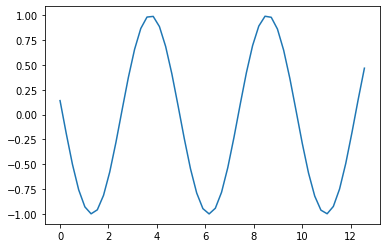

In [0]:
def plot_f(k, p):
    x = np.linspace(0, 4 * np.pi)
    y = np.sin(k*x + p)
    plt.plot(x, y)
    plt.show()
    
plot_f(1.3, 3)

In [0]:
interact(plot_f, k=(0.5, 2), p=(0, 2 * np.pi))

interactive(children=(FloatSlider(value=1.25, description='k', max=2.0, min=0.5), FloatSlider(value=3.14159265…

<function __main__.plot_f>

## 9. Widgets

**What are widgets?**

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

Using widgets:

To use the widget framework, you need to import ipywidgets.

In [0]:
import ipywidgets as widgets

In [0]:
widgets.IntSlider()

IntSlider(value=0)

display()

You can also explicitly display the widget using display(...).

In [0]:
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

If you display the same widget twice, the displayed instances in the front-end will remain in sync with each other. Try dragging the slider below and watch the slider above.

In [0]:
display(w)

IntSlider(value=32)

## 10. Link two similar widgets

If you need to display the same value two different ways, you'll have to use two different widgets. Instead of attempting to manually synchronize the values of the two widgets, you can use the link or jslink function to link two properties together.

In [57]:
a = widgets.FloatText()
b = widgets.FloatSlider()

display(a,b)

mylink = widgets.link((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

AttributeError: ignored

## 11. Widget output

In [0]:
out1 = widgets.Output(layout={'border': '1px solid black'})
out1

Output(layout=Layout(border='1px solid black'))

In [0]:
with out1:
    for i in range(5):
        print(i, 'Hello world!')

Rich output can also be directed to the output area. Anything which displays nicely in a Jupyter notebook will also display well in the Output widget.

In [0]:
from IPython.display import YouTubeVideo
with out1:
    display(YouTubeVideo('J_Cy_QjG6NE'))

In [0]:
with out1:
    display(widgets.IntSlider())

We can also append outputs to the output widget directly with the convenience methods append_stdout, append_stderr

In [0]:
out2 = widgets.Output(layout={'border': '1px solid black'})
out2.append_stdout('Output appended with append_stdout')
out2.append_display_data(YouTubeVideo('eWzY2nGfkXk'))
out2

Output(layout=Layout(border='1px solid black'), outputs=({'output_type': 'stream', 'name': 'stdout', 'text': '…

clear output

In [0]:
out2.clear_output()

## 12. Assignment

Try to implement the same output as the picture shows below.

For scatterplot, use the given scatter_plot function.
Note: when you drag the sliding bar, all the circles should be increased simultaneously.

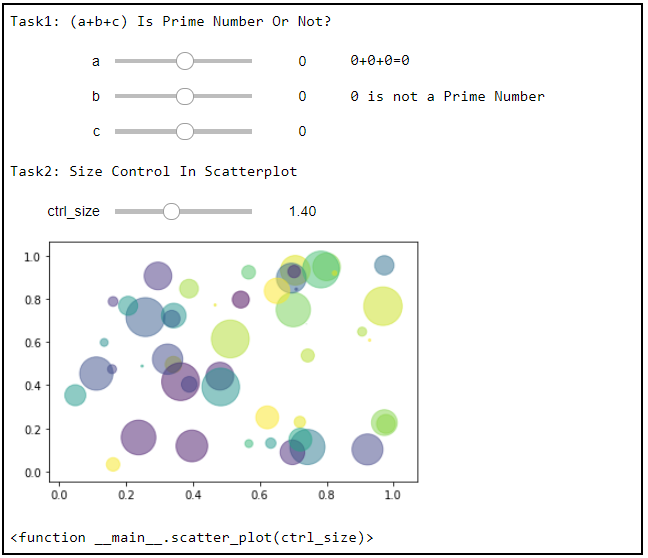

In [0]:
from IPython.display import Image
Image(filename='Assign11.png') 

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [99]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()

ui = widgets.VBox([a, b, c])

def f(a, b, c):
    sum = a + b + c
    print(a,"+",b,"+",c,"=",sum)

    def isPrime(n):
      if n%2==0 or n<2: return (str(n) + " is not a prime number") 
      if n==2 or n==3: return (str(n) + "is a prime number")
      for i in range(3,int(n**0.5)+1,2):
          if n%i==0:
              return (str(n) + " is not a prime number")  
      return (str(n) + " is a prime number")

    print (isPrime(sum))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [0]:
def scatter_plot(size):
        # Fixing random state for reproducibility
        np.random.seed(19680801)
    
        N = 50
        x = np.random.rand(N)
        y = np.random.rand(N)
        colors = np.random.rand(N)
        area = (30 * np.random.rand(N))**2   # 0 to 15 point radii

        plt.scatter(x, y, s=area*size/3, c=colors, alpha=0.5)
        plt.show()

In [101]:
interactive_plot = interactive(scatter_plot, size=(1,12), continuous_update=False)
interactive_plot

interactive(children=(IntSlider(value=6, description='size', max=12, min=1), Output()), _dom_classes=('widget-…